# Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Imagem

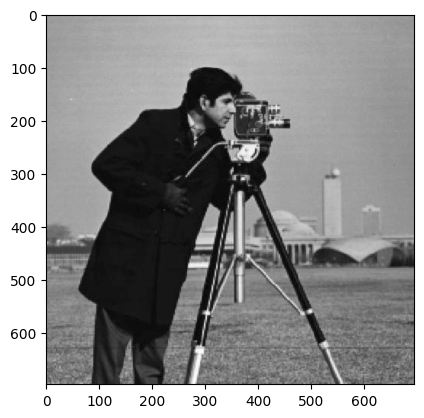

In [2]:
img = cv2.imread('images/Cameraman.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray')
plt.show()

# 2.Image Gradients

2.1 Laplacian Derivatives

2.2 Hough Line Transform
    
2.3 Sobel Operators


## 2.1 Laplacian Derivatives

In [3]:
laplacian_kernel = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]])

In [4]:
def apply_laplacian(img, kernel, thresh):

    img_filtered = np.full_like(img, 0).astype(np.float64)

    for idx, x in np.ndenumerate(img):

        row = idx[0] + 1
        col = idx[1] + 1

        if row < img.shape[0] - 1 and col < img.shape[1] - 1:

            neighbors = img[row - 1:row + 2,
                            col - 1:col + 2]

            new_value = np.sum(neighbors * kernel)

            if new_value > thresh:

                img_filtered[row - 1, col - 1] = 255

            else:

                img_filtered[row - 1, col - 1] = 0

    return img_filtered.astype(np.uint8)

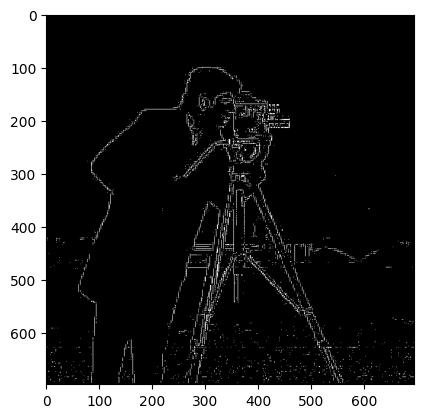

In [5]:
img_laplacian = apply_laplacian(img, laplacian_kernel, thresh = 90)

plt.imshow(img_laplacian, cmap='gray')
plt.show()

## 1.2 Hough Line Transform

In [6]:
def line_filters(kind='horizontal'):

    if kind == 'horizontal':
        filter_ = np.array([[-1, -1, -1],
                            [2, 2, 2],
                            [-1, -1, -1]])
    elif kind == 'vertical':
        filter_ = np.array([[-1, 2, -1],
                            [-1, 2, -1],
                            [-1, 2, -1]])

    elif kind == '+45':
        filter_ = np.array([[2, -1, -1],
                            [-1, 2, -1],
                            [-1, -1, 2]])
    elif kind == '-45':
        filter_ = np.array([[-1, -1, 2],
                            [-1, 2, -1],
                            [2, -1, -1]])

    return filter_

def apply_line_filter(img, kind='horizontal', thresh=50):

    kernel = line_filters(kind)

    img_filtered = np.full_like(img, 0).astype(np.float64)

    for idx, x in np.ndenumerate(img):

        row = idx[0] + 1
        col = idx[1] + 1

        if row < img.shape[0] - 1 and col < img.shape[1] - 1:

            neighbors = img[row - 1:row + 2,
                            col - 1:col + 2]

            new_value = np.sum(neighbors * kernel)

            if new_value > thresh:

                img_filtered[row - 1, col - 1] = 255

            else:

                img_filtered[row - 1, col - 1] = 0

    return img_filtered.astype(np.uint8)

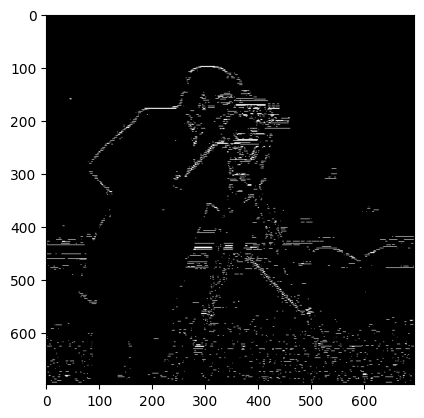

In [7]:
img_line_filtered = apply_line_filter(img, 'horizontal', thresh=50)

plt.imshow(img_line_filtered, cmap='gray')
plt.show()

In [8]:
img_line_horizotal = apply_line_filter(img, 'horizontal', thresh=50)
img_line_vertical = apply_line_filter(img, 'vertical', thresh=50)
img_line_45 = apply_line_filter(img, '+45', thresh=30)
img_line_m45 = apply_line_filter(img, '-45', thresh=30)

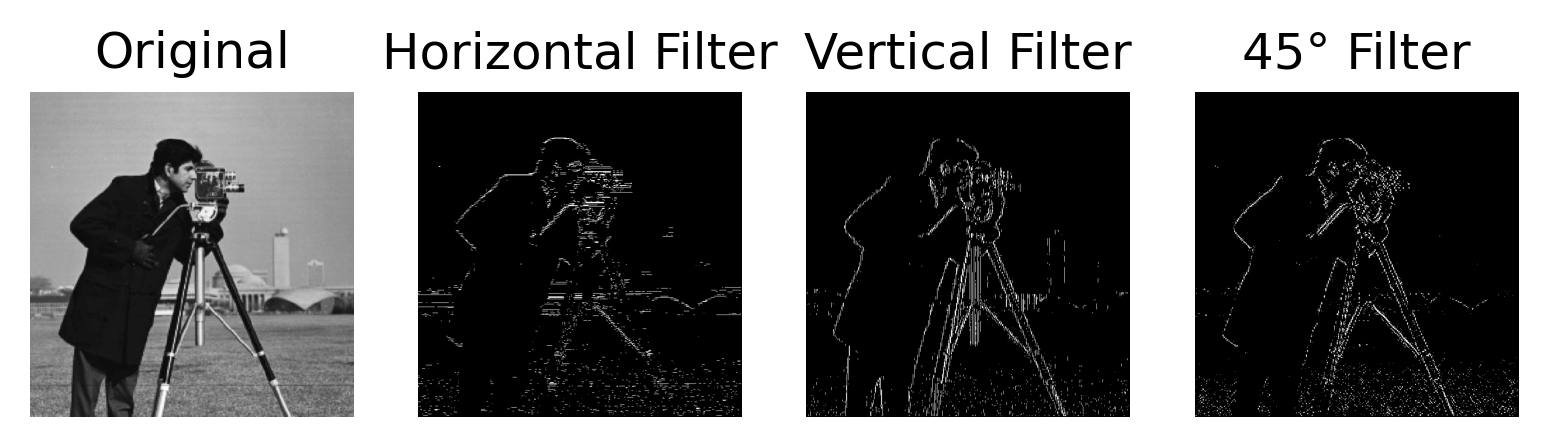

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, dpi = 300)

# Images
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_line_horizotal, cmap='gray')
ax[2].imshow(img_line_vertical, cmap='gray')
ax[3].imshow(img_line_45, cmap='gray')
# ax[4].imshow(img_line_m45, cmap='gray')

ax[0].set_title('Original')
ax[0].axis('off')
ax[1].set_title('Horizontal Filter')
ax[1].axis('off')
ax[2].set_title('Vertical Filter')
ax[2].axis('off')
ax[3].set_title('45° Filter')
ax[3].axis('off')
# ax[4].set_title('Filtro -45°')
# ax[4].axis('off')

plt.show()

## 1.3 Sobel Operator

In [10]:
def sobel_filters(kind='horizontal'):

    if kind == 'horizontal':
        filter_ = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]])
    elif kind == 'vertical':
        filter_ = np.array([[-1,  0,  1],
                            [-2,  0,  2],
                            [-1,  0,  1]])

    elif kind == '+45':
        filter_ = np.array([[0, 1, 2],
                            [-1, 0, 1],
                            [-2, -1, 0]])
    # elif kind == '-45':
    #     filter_ = np.array([[-1, -1, 2],
    #                         [-1, 2, -1],
    #                         [2, -1, -1]])

    return filter_

def apply_sobel_filter(img, kind='horizontal', thresh=50):

    kernel = sobel_filters(kind)

    img_filtered = np.full_like(img, 0).astype(np.float64)

    for idx, x in np.ndenumerate(img):

        row = idx[0] + 1
        col = idx[1] + 1

        if row < img.shape[0] - 1 and col < img.shape[1] - 1:

            neighbors = img[row - 1:row + 2,
                            col - 1:col + 2]

            new_value = np.sum(neighbors * kernel)

            if new_value > thresh:

                img_filtered[row - 1, col - 1] = 255

            else:

                img_filtered[row - 1, col - 1] = 0

    return img_filtered.astype(np.uint8)

In [11]:
img_sobel_x = apply_sobel_filter(img, 'horizontal', thresh=50)
img_sobel_y = apply_sobel_filter(img, 'vertical', thresh=50)
img_sobel_45 = apply_sobel_filter(img, '+45', thresh=50)

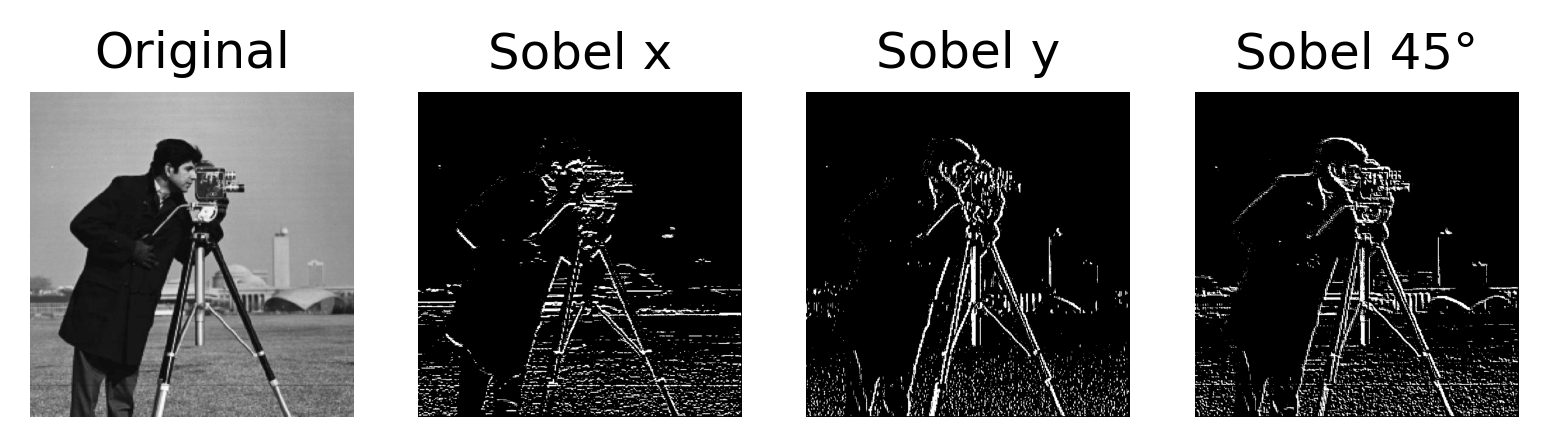

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, dpi = 300)

# Images
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_sobel_x, cmap='gray')
ax[2].imshow(img_sobel_y, cmap='gray')
ax[3].imshow(img_sobel_45, cmap='gray')

ax[0].set_title('Original')
ax[0].axis('off')
ax[1].set_title('Sobel x')
ax[1].axis('off')
ax[2].set_title('Sobel y')
ax[2].axis('off')
ax[3].set_title('Sobel 45°')
ax[3].axis('off')

plt.show()

# 2. Image Thresholding: Otsu's Binarization

In [13]:
def intra_class_var(img, th):

    hist, bins = np.histogram(img.flatten(), bins=256)

    class1 = hist[:th]
    class2 = hist[th:]

    wa = np.sum(class1) / np.sum(hist)
    wb = np.sum(class2) / np.sum(hist)

    return wa * np.var(class1) + wb * np.var(class2)

In [14]:
otsu_threshold = min(range(np.min(img) + 1, np.max(img)), key=lambda th: intra_class_var(img, th))

In [15]:
otsu_threshold

96

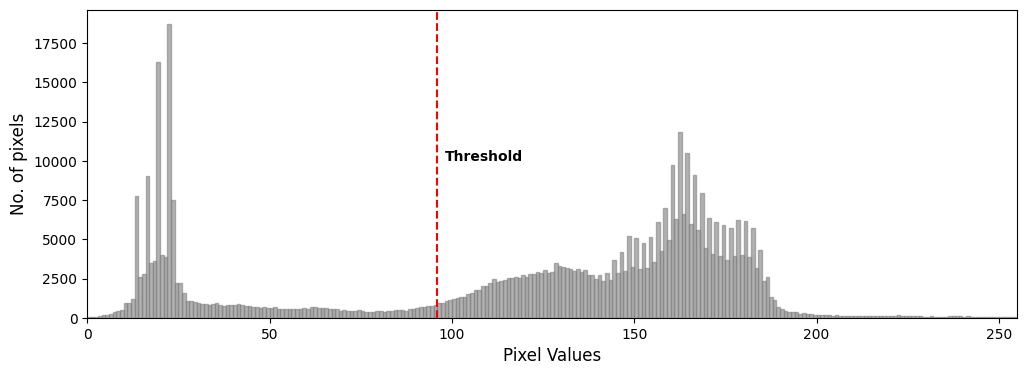

In [16]:
hist, bins = np.histogram(img.flatten(), bins=256)

fig, ax = plt.subplots(figsize=(12, 4), dpi = 100)

ax.bar(range(len(hist)), hist, color = 'gray', alpha = 0.6, edgecolor = 'gray', align = 'edge', width = 1)

ax.axvline(otsu_threshold, ls = '--', color = 'r')
plt.text(x = 98, y = 10000, s = 'Threshold', fontweight = 'bold')

ax.set_xlim([0, 255])

ax.set_xlabel('Pixel Values', size = 12)
ax.set_ylabel('No. of pixels', size = 12)

plt.show()

In [17]:
img_otsu = np.where(img >= otsu_threshold, 255, 0)

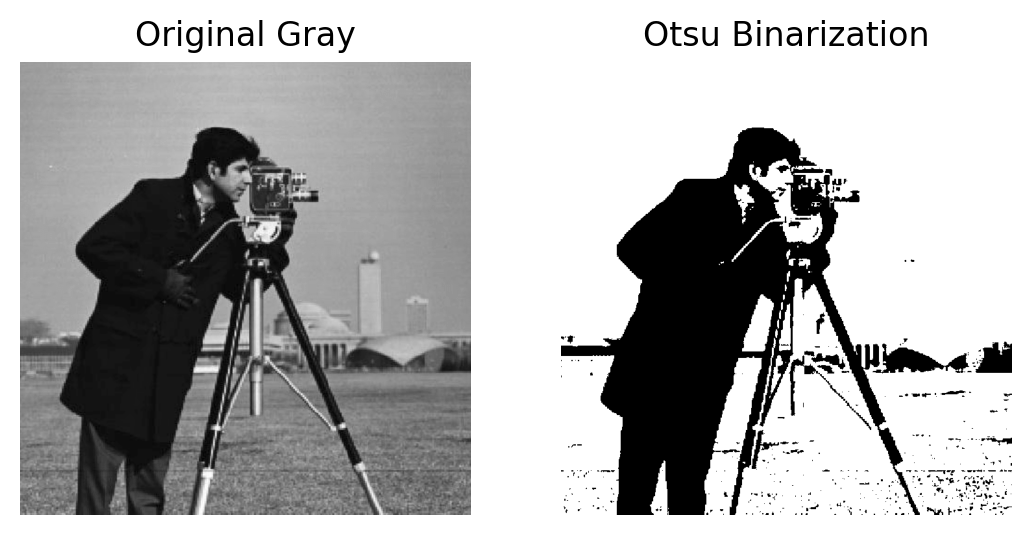

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, dpi = 200)

# Images
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_otsu, cmap='gray')

ax[0].set_title('Original Gray')
ax[0].axis('off')
ax[1].set_title('Otsu Binarization')
ax[1].axis('off')

plt.show()